# Firearm Seizures #
## Lakshya Srinivasan ##

I am measuring safety by calculating the number of firearms that have been seized by the Pittsburgh Police in each neighborhood. The safest neighborhood would have the smallest number of firearm seizures, while the neighborhood with the highest number of firearm seizures would be unsafe to live in.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv("/ihome/cmpinf0010_2025f/las660/Final-Project-Best-Pittsburgh-Neighborhood-/data/firearm_seizures.csv", index_col="_id")

In [4]:
data.head()

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,,,,,
1,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
2,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
3,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
4,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
5,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


In [7]:
data.columns

Index(['address', 'total_count', 'other_count', 'pistol_count',
       'revolver_count', 'rifle_count', 'shotgun_count', 'year', 'month',
       'dow', 'neighborhood', 'council_district', 'ward', 'tract',
       'public_works_division', 'police_zone', 'fire_zone', 'latitude',
       'longitude'],
      dtype='object')

In [17]:
cols = ["neighborhood", "total_count", "pistol_count", "revolver_count", "rifle_count", "shotgun_count"]

# Group by neighborhood and sum all counts
top20 = (data.dropna(subset=["neighborhood"]).groupby("neighborhood")[cols[1:]].sum().reset_index().sort_values(by="total_count", ascending=True).head(20))

top20

,neighborhood,total_count,pistol_count,revolver_count,rifle_count,shotgun_count
78,Summer Hill,3,2,0,0,1
79,Swisshelm Park,3,1,1,1,0
20,Chartiers City,4,3,1,0,0
57,Oakwood,4,2,1,0,1
53,Mt. Oliver,4,2,1,0,1
64,Regent Square,4,2,1,0,0
32,Friendship,5,4,1,0,0
84,West End,6,6,0,0,0
75,St. Clair,7,5,0,1,1
36,Hays,8,6,1,1,0


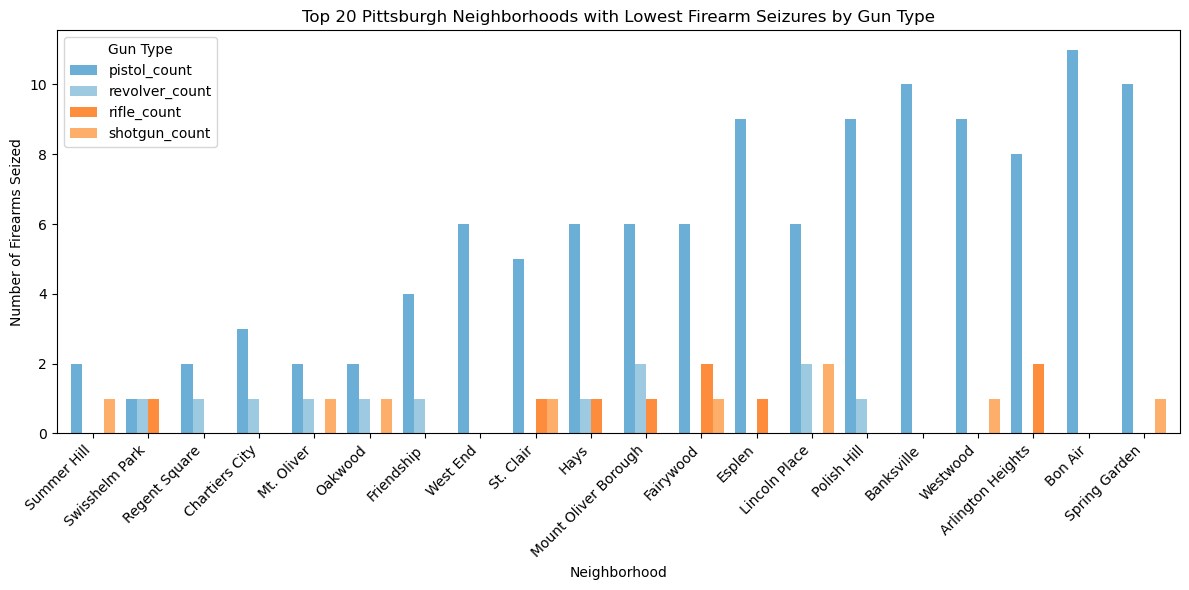

In [16]:
#filter columns only needed
cols = ["neighborhood", "pistol_count", "revolver_count", "rifle_count", "shotgun_count"]

#group firearms by neighborhood
gun_types_by_neighborhood = (data.dropna(subset=["neighborhood"]).groupby("neighborhood")[cols[1:]].sum().reset_index())

#get total firearm seizures per neighborhood
gun_types_by_neighborhood["total_count"] = gun_types_by_neighborhood[["pistol_count", "revolver_count", "rifle_count", "shotgun_count"]].sum(axis=1)

#sort total_count from least to greatest
lowest20 = gun_types_by_neighborhood.sort_values(by="total_count", ascending=True).head(20)

#making colors
color_map = ["#6baed6", "#9ecae1", "#fd8d3c", "#fdae6b"]

#customizing the bars and setting labels
lowest20.set_index("neighborhood")[["pistol_count", "revolver_count", "rifle_count", "shotgun_count"]].plot(kind="bar",figsize=(12,6),color=color_map,width=0.8)

#making chart
plt.title("Top 20 Pittsburgh Neighborhoods with Lowest Firearm Seizures by Gun Type")
plt.ylabel("Number of Firearms Seized")
plt.xlabel("Neighborhood")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Gun Type")
plt.tight_layout()
plt.show()

In [6]:
data["neighborhood"].unique()

city = data[data["neighborhood"].str.lower().str.strip() == "chartiers city"]

total = city.groupby("neighborhood")["total_count"].sum()

total

neighborhood
Chartiers City    4
Name: total_count, dtype: int64

## Conclusion

The Top 5 neighborhoods that are the safest are Summer Hill, Swisshelm Park, Regent Square, Chartiers City, and Mt. Oliver because they have the lowest amount of firearm seizures compared to other neighborhoods in Pittsburgh. The most popular type of gun that was seized was a pistol. 